In [1]:
# import important libraries

import pandas as pd
import numpy as np
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
fn=pd.read_csv('train_news.csv')

In [3]:
fn

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [4]:
#count of target variable - 1 is for fake news and 0 is for not fake news
fn['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [5]:
fn.shape 

(20800, 6)

In [6]:
fn.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [7]:
fn.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(fn.isnull())

In [10]:
# now treat null values

fn.headline.fillna('not available',inplace=True)
fn.written_by.fillna('Unknown',inplace=True)
fn.news.fillna('Not available',inplace=True)

In [11]:
fn.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

In [12]:
# Creating new column for Length of news_text, headline_text  
fn['length_of_headline'] = fn.headline.str.len()
fn['length_of_news'] = fn.news.str.len()
fn.head(5)

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  \
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0   
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0   
2  Sunday on ABC’s “This Week,” while discussing ...      0   
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0   
4    Finian Cunningham has written extensively on...      1   

   length_of_headline  length_of_news  
0                  84            7936  
1                  72            6112  
2                 100             425  
3                 100            6516  
4                  28            9164

In [13]:
# Convert all headline text and news text to lower case
fn['headline'] = fn['headline'].str.lower()
fn['news'] = fn['news'].str.lower()
fn

Unnamed: 0     id                                           headline  \
0               0   9653  ethics questions dogged agriculture nominee as...   
1               1  10041  u.s. must dig deep to stop argentina’s lionel ...   
2               2  19113  cotton to house: ’do not walk the plank and vo...   
3               3   6868  paul lepage, besieged maine governor, sends co...   
4               4   7596                       a digital 9/11 if trump wins   
...           ...    ...                                                ...   
20795       20795   5671                                      not available   
20796       20796  14831        albert pike and the european migrant crisis   
20797       20797  18142  dakota access caught infiltrating protests to ...   
20798       20798  12139  how to stretch the summer solstice - the new y...   
20799       20799  15660  emory university to pay for ’100 percent’ of u...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  \
0      washington  —   in sonny perdue’s telling, geo...      0   
1      houston  —   venezuela had a plan. it was a ta...      0   
2      sunday on abc’s “this week,” while discussing ...      0   
3      augusta, me.  —   the beleaguered republican g...      0   
4        finian cunningham has written extensively on...      1   
...                                                  ...    ...   
20795  no, you'll be a dog licking of the vomit of yo...      1   
20796  by rixon stewart on november 5, 2016 rixon ste...      1   
20797  posted by eddie you know the dakota access pip...      1   
20798  it’s officially summer, and the society boutiq...      0   
20799  emory university in atlanta, georgia, has anno...      0   

       length_of_headline  length_of_news  
0                      84            7936  
1                      72            6112  
2                     100             425  
3                     100            6516  
4                      28            9164  
...                   ...             ...  
20795                  13              69  
20796                  43            6621  
20797                  84            3433  
20798                  55            2334  
20799                  93            1932  

[20800 rows x 8 columns]

In [14]:
# Replace email addresses with 'email'
fn['headline'] = fn['headline'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                    'emailaddress')
fn['news'] = fn['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                    'emailaddress')

# Replace URLs with 'webaddress'
fn['headline'] = fn['headline'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
fn['news'] = fn['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
fn['headline'] = fn['headline'].str.replace(r'£|\$', 'dollers')
fn['news'] = fn['news'].str.replace(r'£|\$', 'dollers')


# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
fn['headline'] = fn['headline'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
fn['news'] = fn['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
fn['headline'] = fn['headline'].str.replace(r'\d+(\.\d+)?', 'numbr')
fn['news'] = fn['news'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
# Remove punctuation
fn['headline'] = fn['headline'].str.replace(r'[^\w\d\s]', ' ')
fn['news'] = fn['news'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
fn['headline'] = fn['headline'].str.replace(r'\s+', ' ')
fn['news'] = fn['news'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
fn['headline'] = fn['headline'].str.replace(r'^\s+|\s+?$', '')
fn['news'] = fn['news'].str.replace(r'^\s+|\s+?$', '')

In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', 'im', 'dont', 'doin', 'ure'])

fn['headline'] = fn['headline'].apply(lambda x: ' '.join(
    term for term in str(x).split() if term not in stop_words))



fn['news'] = fn['news'].apply(lambda x: ' '.join(
    term for term in str(x).split() if term not in stop_words))

In [17]:
# New column (clean_length) after puncuations,stopwords removal
fn['clean_length_of_headline'] = fn.headline.str.len()
fn['clean_length_of_news'] = fn.news.str.len()

fn.head()

Unnamed: 0     id                                           headline  \
0           0   9653  ethics questions dogged agriculture nominee ge...   
1           1  10041  must dig deep stop argentina lionel messi new ...   
2           2  19113  cotton house walk plank vote bill cannot pass ...   
3           3   6868  paul lepage besieged maine governor sends conf...   
4           4   7596                     digital numbr numbr trump wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  \
0  washington sonny perdue telling georgians grow...      0   
1  houston venezuela plan tactical approach desig...      0   
2  sunday abc week discussing republican plan rep...      0   
3  augusta beleaguered republican governor maine ...      0   
4  finian cunningham written extensively internat...      1   

   length_of_headline  length_of_news  clean_length_of_headline  \
0                  84            7936                        75   
1                  72            6112                        56   
2                 100             425                        62   
3                 100            6516                        87   
4                  28            9164                        30   

   clean_length_of_news  
0                  5525  
1                  4163  
2                   269  
3                  4412  
4                  6726

In [18]:
# Total length removal
print ('Origian Length', fn.length_of_headline.sum())
print ('Clean Length', fn.clean_length_of_headline.sum())

print ('Origian Length', fn.length_of_news.sum())
print ('Clean Length', fn.clean_length_of_news.sum())


Origian Length 1511626
Clean Length 1216891
Origian Length 94519431
Clean Length 65670970


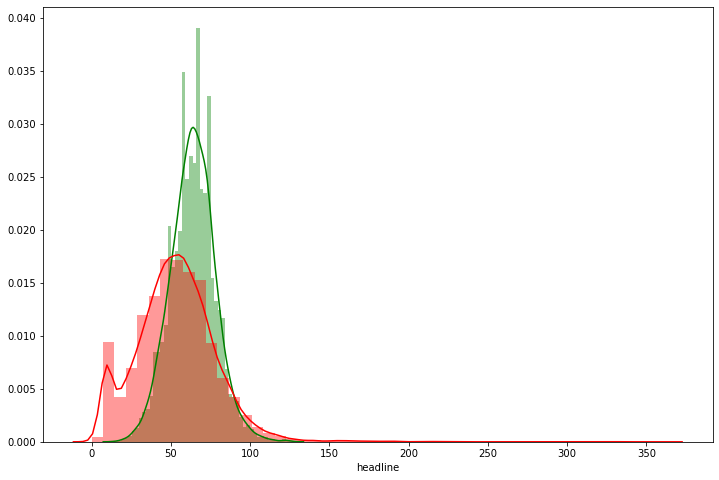

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(fn[fn.label == 0]['headline'].str.len(), color='g')
sns.distplot(fn[fn.label == 1]['headline'].str.len(), color='r')

Obeservation - Above graph shows fake news have less words whereas genuine news have more words as compare to fake news.

Most of the headlines have between 30 to 100 words. 

In [20]:
plt.figure(figsize=(20,16))
sns.distplot(fn[fn.label == 0]['news'].str.len(), color='g',bins=900)
sns.distplot(fn[fn.label == 1]['news'].str.len(), color='b', bins=900)

Obeservation - Above graph shows fake news have less words whereas genuine news have more words as compare to fake news.

In [21]:
# Now will combine headline and written by columns as written_by alone would not provide much vlues sinces it's mostly names of the authors.


fn['headline_author'] = fn.headline + ' ' + fn.written_by

In [22]:
fn.head()

Unnamed: 0     id                                           headline  \
0           0   9653  ethics questions dogged agriculture nominee ge...   
1           1  10041  must dig deep stop argentina lionel messi new ...   
2           2  19113  cotton house walk plank vote bill cannot pass ...   
3           3   6868  paul lepage besieged maine governor sends conf...   
4           4   7596                     digital numbr numbr trump wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  \
0  washington sonny perdue telling georgians grow...      0   
1  houston venezuela plan tactical approach desig...      0   
2  sunday abc week discussing republican plan rep...      0   
3  augusta beleaguered republican governor maine ...      0   
4  finian cunningham written extensively internat...      1   

   length_of_headline  length_of_news  clean_length_of_headline  \
0                  84            7936                        75   
1                  72            6112                        56   
2                 100             425                        62   
3                 100            6516                        87   
4                  28            9164                        30   

   clean_length_of_news                                    headline_author  
0                  5525  ethics questions dogged agriculture nominee ge...  
1                  4163  must dig deep stop argentina lionel messi new ...  
2                   269  cotton house walk plank vote bill cannot pass ...  
3                  4412  paul lepage besieged maine governor sends conf...  
4                  6726   digital numbr numbr trump wins Finian Cunningham

In [23]:
from nltk.stem.porter import PorterStemmer

In [24]:
# Training data

import re

def nlp_preprocessor(X,col):
    corpus_train=[]
    ps = PorterStemmer()
    for i in range(len(X)):
        input = re.sub('[^a-zA-Z]',' ',X[col][i]) # except a-z and A-Z, substitute all other characters with ' '
        input  = input.split() # tokenize the text
        input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
        text = ' '.join(input)  # concatenating all words into a single text (list is created)#
        corpus_train.append(text) # appending text into a single corpus #
    print("The length of the corpus train is: ", len(corpus_train))
    return corpus_train

In [25]:
data = nlp_preprocessor(fn,'news')

The length of the corpus train is:  20800


In [26]:
cleaned_news = data.copy()

In [27]:
cleaned_headline_author = nlp_preprocessor(fn,'headline_author')

The length of the corpus train is:  20800


In [28]:
cleaned_fn = pd.DataFrame(list(zip(cleaned_news,cleaned_headline_author,fn.label)),columns=['cleaned_news','cleaned_headline_author','label'])

In [29]:
cleaned_fn

cleaned_news  \
0      washington sonni perdu tell georgian grow wear...   
1      houston venezuela plan tactic approach design ...   
2      sunday abc week discuss republican plan repeal...   
3      augusta beleagu republican governor main seem ...   
4      finian cunningham written extens intern affair...   
...                                                  ...   
20795                     dog lick vomit chines overlord   
20796  rixon stewart novemb numbr numbr rixon stewart...   
20797  post eddi know dakota access pipelin protest w...   
20798  offici summer societi boutiqu societi memori s...   
20799  emori univers atlanta georgia announc fund num...   

                                 cleaned_headline_author  label  
0      ethic question dog agricultur nomine georgia g...      0  
1      must dig deep stop argentina lionel messi new ...      0  
2      cotton hous walk plank vote bill cannot pass s...      0  
3      paul lepag besieg main governor send conflict ...      0  
4          digit numbr numbr trump win finian cunningham      1  
...                                                  ...    ...  
20795                                 avail neversurrend      1  
20796   albert pike european migrant crisi rixon stewart      1  
20797  dakota access caught infiltr protest incit vio...      1  
20798  stretch summer solstic new york time alison S ...      0  
20799  emori univers pay numbr percent undocu student...      0  

[20800 rows x 3 columns]

In [30]:
from wordcloud import WordCloud

In [31]:
fake_news = cleaned_fn['cleaned_news'][cleaned_fn['label']==1]

fake_news_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake_news))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

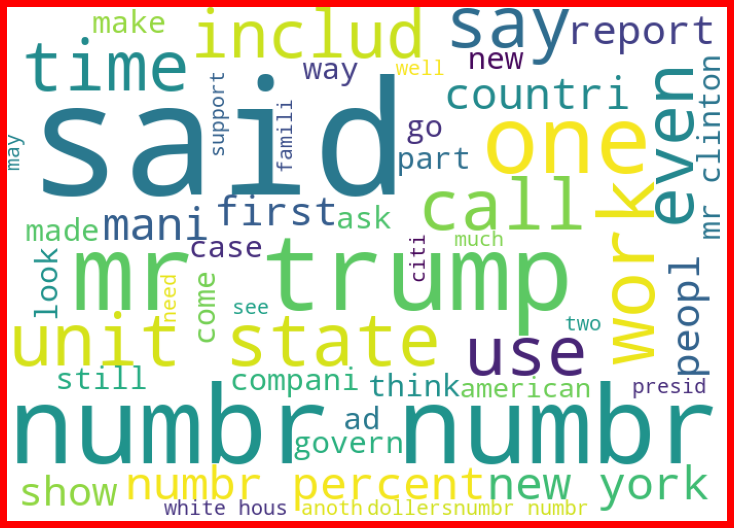

In [32]:
note_fake_news = cleaned_fn['cleaned_news'][cleaned_fn['label']==0]

not_fake_news_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(note_fake_news))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
fake_news = cleaned_fn['cleaned_headline_author'][cleaned_fn['label']==1]

fake_news_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake_news))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

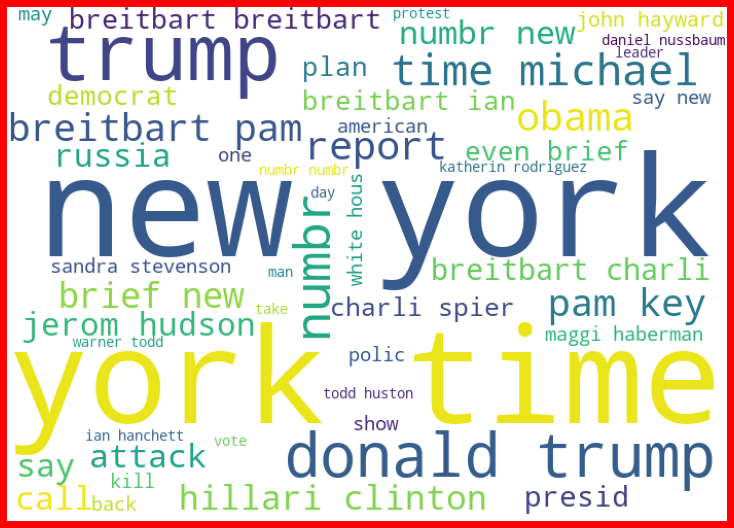

In [34]:
note_fake_news = cleaned_fn['cleaned_headline_author'][cleaned_fn['label']==0]

not_fake_news_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(note_fake_news))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Saving the cleaned data

In [35]:
cleaned_fn.to_csv('cleaned_data.csv',index=False,columns=cleaned_fn.columns)

In [36]:
cleaned_fn  = pd.read_csv("cleaned_data.csv")

In [37]:
cleaned_fn.isnull().sum()

cleaned_news               91
cleaned_headline_author    29
label                       0
dtype: int64

In [38]:
cleaned_fn.dropna(inplace=True)

In [39]:
cleaned_fn.isnull().sum()

cleaned_news               0
cleaned_headline_author    0
label                      0
dtype: int64

In [40]:
cleaned_fn.shape

(20680, 3)

# Train and Test split

In [41]:
training_data = cleaned_fn.iloc[:16000,:]
testing_data = cleaned_fn.iloc[16000:,:2]

In [42]:
training_data

cleaned_news  \
0      washington sonni perdu tell georgian grow wear...   
1      houston venezuela plan tactic approach design ...   
2      sunday abc week discuss republican plan repeal...   
3      augusta beleagu republican governor main seem ...   
4      finian cunningham written extens intern affair...   
...                                                  ...   
16088  next prev swipe left right late work blame day...   
16089  well fargo bank account scandal took center st...   
16090  home news ukrain trump possibl path ukrain cri...   
16091  former secret servic agent serv secur detail p...   
16092  ex rep trump lose grab musket previous tweet c...   

                                 cleaned_headline_author  label  
0      ethic question dog agricultur nomine georgia g...      0  
1      must dig deep stop argentina lionel messi new ...      0  
2      cotton hous walk plank vote bill cannot pass s...      0  
3      paul lepag besieg main governor send conflict ...      0  
4          digit numbr numbr trump win finian cunningham      1  
...                                                  ...    ...  
16088                               late work poke staff      1  
16089      well fargo feder reserv bigger fraud ron paul      1  
16090  trump possibl path ukrain crisi consortiumnew ...      1  
16091  exclus former secret servic agent warn trump s...      0  
16092            ex rep trump lose grab musket NO author      1  

[16000 rows x 3 columns]

In [43]:
testing_data

cleaned_news  \
16093  nichola clinch audaci intrepid mountain led ex...   
16094  sen lindsey graham propos feder law would requ...   
16095  wiaawist let jaylen give sister syd hug win st...   
16096  must feel like death row wait moment iron door...   
16097  la vega disturb imag seem distant tabloid tale...   
...                                                  ...   
20795                     dog lick vomit chines overlord   
20796  rixon stewart novemb numbr numbr rixon stewart...   
20797  post eddi know dakota access pipelin protest w...   
20798  offici summer societi boutiqu societi memori s...   
20799  emori univers atlanta georgia announc fund num...   

                                 cleaned_headline_author  
16093  nichola clinch took unclimb mountain die numbr...  
16094  graham numbr tax law potu candid unconstitut k...  
16095  watch wisconsin athlet offici prevent sibl hug...  
16096                        doomsday elect mike whitney  
16097  britney spear readi stand new york time serg F...  
...                                                  ...  
20795                                 avail neversurrend  
20796   albert pike european migrant crisi rixon stewart  
20797  dakota access caught infiltr protest incit vio...  
20798  stretch summer solstic new york time alison S ...  
20799  emori univers pay numbr percent undocu student...  

[4680 rows x 2 columns]

In [44]:
testing_data_ground_truth = cleaned_fn.iloc[16000:,-1]

In [45]:
print("training data shape : ", training_data.shape)
print("testing data shape : ", testing_data.shape)

training data shape :  (16000, 3)
testing data shape :  (4680, 2)


#### splitting feature and target variable 

In [46]:
X = training_data.iloc[:,:-1]
y = training_data.iloc[:,-1]

In [47]:
X.shape,y.shape

((16000, 2), (16000,))

# Tokenization/Vectorization

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((11200, 2), (11200,), (4800, 2), (4800,))

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [52]:
X_train_vect = cv.fit_transform(X_train.cleaned_news).toarray()

In [53]:
X_val_vect = cv.transform(X_val.cleaned_news).toarray()

# Model building
Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.metrics import log_loss,recall_score,precision_score,f1_score,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,accuracy_score,roc_auc_score

In [56]:
def train_n_pred_model(model_name):
    model_name.fit(X_train_vect,y_train)
    model_name.score(X_train_vect,y_train)
    y_preds = model_name.predict(X_val_vect)
    print('Accuracy score of',model_name, 'is:')
    print(accuracy_score(y_val,y_preds))
    print("Log loss -->" , log_loss(y_val,y_preds))
    print("Recall -->" , recall_score(y_val,y_preds))
    print("Precision -->" , precision_score(y_val,y_preds))
    print("F1 Score --> ",f1_score(y_val,y_preds))
    print("Classification Report --> \n", classification_report(y_val,y_preds))

In [57]:
train_n_pred_model(LogisticRegression())

Accuracy score of LogisticRegression() is:
0.9491666666666667
Log loss --> 1.7557431223372908
Recall --> 0.9530004196391104
Precision --> 0.9450686641697877
F1 Score -->  0.9490179690764732
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2417
           1       0.95      0.95      0.95      2383

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
train_n_pred_model(DecisionTreeClassifier())

Accuracy score of DecisionTreeClassifier() is:
0.8985416666666667
Log loss --> 3.504289333596591
Recall --> 0.9030633655056651
Precision --> 0.893687707641196
F1 Score -->  0.8983510749321646
Classification Report --> 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2417
           1       0.89      0.90      0.90      2383

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
train_n_pred_model(RandomForestClassifier())

Accuracy score of RandomForestClassifier() is:
0.9520833333333333
Log loss --> 1.655002026028438
Recall --> 0.95132186319765
Precision --> 0.9521209575808484
F1 Score -->  0.9517212426532325
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2417
           1       0.95      0.95      0.95      2383

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
train_n_pred_model(AdaBoostClassifier())

Accuracy score of AdaBoostClassifier() is:
0.93875
Log loss --> 2.1155292061779223
Recall --> 0.9500629458665547
Precision --> 0.9282492824928249
F1 Score -->  0.9390294483616756
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2417
           1       0.93      0.95      0.94      2383

    accuracy                           0.94      4800
   macro avg       0.94      0.94      0.94      4800
weighted avg       0.94      0.94      0.94      4800



In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
train_n_pred_model(MultinomialNB())

Accuracy score of MultinomialNB() is:
0.9085416666666667
Log loss --> 3.158887410109658
Recall --> 0.887536718422157
Precision --> 0.9251968503937008
F1 Score -->  0.9059755836367531
Classification Report --> 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2417
           1       0.93      0.89      0.91      2383

    accuracy                           0.91      4800
   macro avg       0.91      0.91      0.91      4800
weighted avg       0.91      0.91      0.91      4800



In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
train_n_pred_model(KNeighborsClassifier())

Accuracy score of KNeighborsClassifier() is:
0.7720833333333333
Log loss --> 7.872132201378916
Recall --> 0.9676877885018884
Precision --> 0.6939512488715016
F1 Score -->  0.8082719943918681
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.58      0.72      2417
           1       0.69      0.97      0.81      2383

    accuracy                           0.77      4800
   macro avg       0.82      0.77      0.76      4800
weighted avg       0.82      0.77      0.76      4800



# Final Model Testing on the Test Dataset

In [68]:
testing_data

cleaned_news  \
16093  nichola clinch audaci intrepid mountain led ex...   
16094  sen lindsey graham propos feder law would requ...   
16095  wiaawist let jaylen give sister syd hug win st...   
16096  must feel like death row wait moment iron door...   
16097  la vega disturb imag seem distant tabloid tale...   
...                                                  ...   
20795                     dog lick vomit chines overlord   
20796  rixon stewart novemb numbr numbr rixon stewart...   
20797  post eddi know dakota access pipelin protest w...   
20798  offici summer societi boutiqu societi memori s...   
20799  emori univers atlanta georgia announc fund num...   

                                 cleaned_headline_author  
16093  nichola clinch took unclimb mountain die numbr...  
16094  graham numbr tax law potu candid unconstitut k...  
16095  watch wisconsin athlet offici prevent sibl hug...  
16096                        doomsday elect mike whitney  
16097  britney spear readi stand new york time serg F...  
...                                                  ...  
20795                                 avail neversurrend  
20796   albert pike european migrant crisi rixon stewart  
20797  dakota access caught infiltr protest incit vio...  
20798  stretch summer solstic new york time alison S ...  
20799  emori univers pay numbr percent undocu student...  

[4680 rows x 2 columns]

In [69]:
test_vect4 = cv.transform(testing_data.cleaned_news).toarray()

In [70]:
test_vect4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect,y_train)

LogisticRegression(max_iter=1000)

In [72]:
test_prediction = model.predict(test_vect4)

Final Model Evaluation

In [73]:
# Log Loss
log_loss(testing_data_ground_truth,test_prediction)

1.8745646895603432

In [74]:
#Recall
recall_score(testing_data_ground_truth,test_prediction)

0.9531968240702048

In [75]:
# Precision
precision_score(testing_data_ground_truth,test_prediction)

0.9413949649195212

In [76]:
# F1-Score
f1_score(testing_data_ground_truth,test_prediction)

0.9472591362126245

In [77]:
# ROC_AUC Score
roc_auc_score(testing_data_ground_truth,test_prediction)

0.9455533748685085

In [78]:
# Classification Report
print(classification_report(testing_data_ground_truth,test_prediction))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2287
           1       0.94      0.95      0.95      2393

    accuracy                           0.95      4680
   macro avg       0.95      0.95      0.95      4680
weighted avg       0.95      0.95      0.95      4680



In [79]:
# Confusion Matrix
plot_confusion_matrix(model,test_vect4,testing_data_ground_truth)

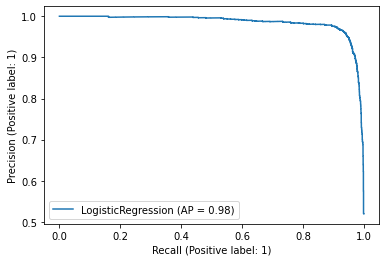

In [80]:
# Sensitivity and Specificity Curve
plot_precision_recall_curve(model,test_vect4,testing_data_ground_truth)

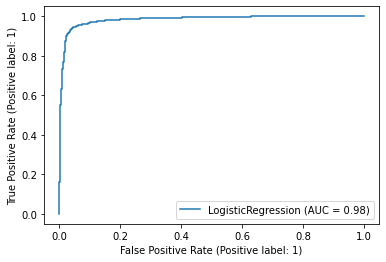

In [81]:
#ROC CURVE
plot_roc_curve(model,test_vect4,testing_data_ground_truth)

# Saving the final model

In [82]:
import joblib

In [83]:
joblib.dump(model,'fake_news_prediction_model.pkl')

['fake_news_prediction_model.pkl']

In [84]:
test_prediction=pd.DataFrame(data=test_prediction)

In [85]:
test_prediction

0
0     0
1     0
2     0
3     1
4     0
...  ..
4675  1
4676  1
4677  1
4678  0
4679  0

[4680 rows x 1 columns]

In [86]:
test_prediction.to_csv('fake_news_prediction_data.csv') 